# Testing Document
For the purpose of debugging daily challenge or coursework code for when the limited error messages in the freeCodeCamp environment are insufficient.

In [5]:
def get_hill_rating(drop, distance, hill_type):
    steepness = drop / distance

    if hill_type == 'Downhill':
        adj_steepness = steepness * 1.2
    elif hill_type == 'Slalom':
        adj_steepness = steepness * 0.9
    elif hill_type == 'Giant Slalom':
        adj_steepness = steepness * 1.0
    
    if adj_steepness <= 0.1:
        return 'Green'
    elif 0.1 < adj_steepness <= 0.25:
        return 'Blue'
    elif adj_steepness > 0.25:
        return 'Black'

In [6]:
get_hill_rating(420, 1680, "Giant Slalom")

'Blue'

100%|██████████| 100/100 [00:23<00:00,  4.26it/s]



HH Expectation: 0.24988654000000002 and Variance: 0.3181456084
HT Expectation: 0.25002517 and Variance: 0.0727534611
TH Expectation: 0.25002524 and Variance: 0.0727725424
TT Expectation: 0.25006305 and Variance: 0.3095054075

Heads Expectation: 0.49991171 and Variance: 0.2410990659
Tails Expectation: 0.50008829 and Variance: 0.2410990659



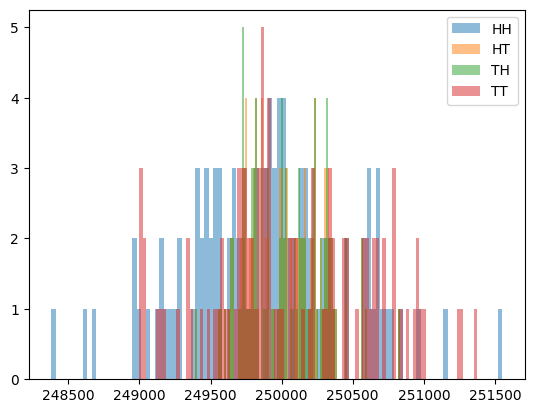

In [5]:
# Coin toss experiment

import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

TRIALS = 100
FLIPS = 1000000

h_h_list = []
h_t_list = []
t_h_list = []
t_t_list = []
heads_list = []
tails_list = []

for trial in tqdm(range(TRIALS)):
    h_h = 0
    h_t = 0
    t_h = 0
    t_t = 0
    heads = 0
    tails = 0

    last_flip = None

    for flip in range(FLIPS):
        if random.random() < 0.5:
            heads += 1
            if last_flip == 'H':
                h_h += 1
            else:
                h_t += 1
            last_flip = 'H'
        else: 
            tails += 1
            if last_flip == 'T':
                t_t += 1
            else:
                t_h += 1
            last_flip = 'T'
        
    h_h_list.append(h_h)
    h_t_list.append(h_t)
    t_h_list.append(t_h)
    t_t_list.append(t_t)
    heads_list.append(heads)
    tails_list.append(tails)

results = f'''
HH Expectation: {np.mean(h_h_list)/FLIPS} and Variance: {np.var(h_h_list)/FLIPS}
HT Expectation: {np.mean(h_t_list)/FLIPS} and Variance: {np.var(h_t_list)/FLIPS}
TH Expectation: {np.mean(t_h_list)/FLIPS} and Variance: {np.var(t_h_list)/FLIPS}
TT Expectation: {np.mean(t_t_list)/FLIPS} and Variance: {np.var(t_t_list)/FLIPS}

Heads Expectation: {np.mean(heads_list)/FLIPS} and Variance: {np.var(heads_list)/FLIPS}
Tails Expectation: {np.mean(tails_list)/FLIPS} and Variance: {np.var(tails_list)/FLIPS}
'''

print(results)

plt.hist(h_h_list, bins=100, alpha=0.5, label='HH')
plt.hist(h_t_list, bins=100, alpha=0.5, label='HT')
plt.hist(t_h_list, bins=100, alpha=0.5, label='TH')
plt.hist(t_t_list, bins=100, alpha=0.5, label='TT')
plt.legend()
plt.show()
